In [1]:
# Imports

from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
import matplotlib.pyplot as plt
from pypfopt.efficient_frontier import EfficientFrontier

from src.yfinance_data_loader import load_data

<h2>Loading the Data</h2>
<p>Data can be loaded and parsed using the load_data function found in the local yfinance_data_loader package.</p>


In [2]:
hist_data = load_data(['AAPL', 'GOOGL', 'TSLA', 'TSCO', 'META'], start='2015-01-01')
hist_data

[*********************100%***********************]  5 of 5 completed


,AAPL,GOOGL,META,TSCO,TSLA
Date,,,,,
2015-01-02,27.332500,26.477501,78.449997,78.070000,14.620667
2015-01-05,26.562500,25.973000,77.190002,76.470001,14.006000
2015-01-06,26.565001,25.332001,76.150002,75.300003,14.085333
2015-01-07,26.937500,25.257500,76.150002,77.739998,14.063333
2015-01-08,27.972500,25.345501,78.180000,80.919998,14.041333
...,...,...,...,...,...
2022-08-29,161.380005,109.419998,159.169998,190.130005,284.820007
2022-08-30,158.910004,108.940002,157.160004,188.089996,277.700012
2022-08-31,157.220001,108.220001,162.929993,185.149994,275.609985


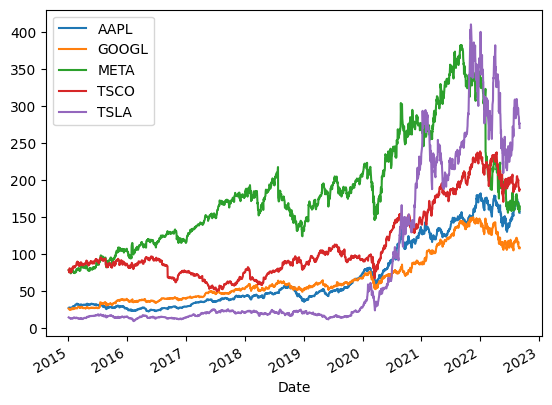

In [3]:
hist_data.plot()
plt.show()

<h2>Mean Returns and Covariance</h2>
<p>The pypfopt package can be used to calculate both the mean historical returns and covariance of the investment which make up the portfolio given the historical data.</p>
<p>These are both used later when performing mean-variance optimisation.</p>

In [4]:
mu = mean_historical_return(hist_data)
S = CovarianceShrinkage(hist_data).ledoit_wolf()

print(mu)
print(S)

,AAPL,GOOGL,META,TSCO,TSLA
AAPL,0.087376,0.050410,0.058195,0.033242,0.069445
GOOGL,0.050410,0.077309,0.064461,0.029125,0.059309
META,0.058195,0.064461,0.125772,0.031992,0.069119
TSCO,0.033242,0.029125,0.031992,0.086136,0.042076
TSLA,0.069445,0.059309,0.069119,0.042076,0.314385


/tmp/ipykernel_736/1637181710.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticker_names)
/tmp/ipykernel_736/1637181710.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ticker_names)


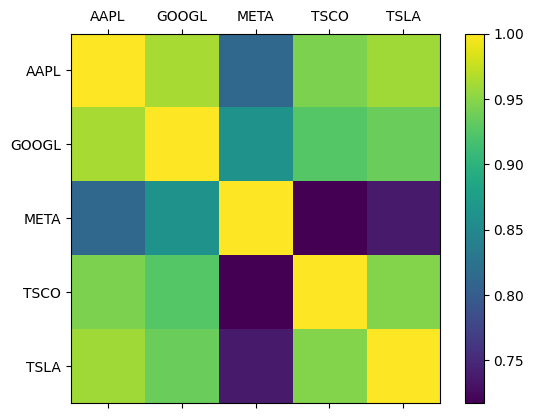

In [5]:
ticker_names = [''] + hist_data.columns.values.tolist()
correlation = hist_data.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, interpolation='nearest')
fig.colorbar(cax)

ax.set_xticklabels(ticker_names)
ax.set_yticklabels(ticker_names)

plt.show()

In [7]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

print(weights)

OrderedDict([('AAPL', 0.5152997574944762), ('GOOGL', 0.1814596074773602), ('META', 0.0), ('TSCO', 0.0), ('TSLA', 0.3032406350281636)])


In [8]:
ef.portfolio_performance(verbose=True)

Expected annual return: 30.8%
Annual volatility: 30.4%
Sharpe Ratio: 0.95


(0.30837977722725946, 0.30383087928811964, 0.9491457152180767)